In [4]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import os
import PIL # for reading tif images
import h5py

results = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\"

def get_max_idx(data):
    """return max value and corresponding index for 1d data"""
    maxdat = 0
    maxidx = 0
    for i,dat in enumerate(data):
        if dat > maxdat:
            maxdat = dat
            maxidx = i
    return maxdat, maxidx

## September 2023

### 2023.09.05

control is with the y shim offset to intentionally lose the MOT

In [108]:
f = h5py.File(os.path.join(results, '2023-09-05\\17\\000004965-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts_all = list(f['datasets']['photocounts'])[1:]
photocounts_control = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==0]
photocounts = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==1]

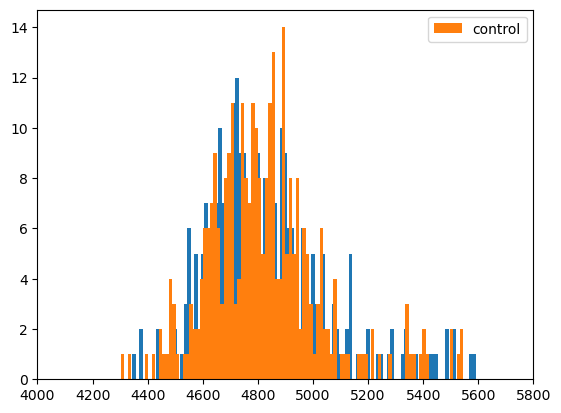

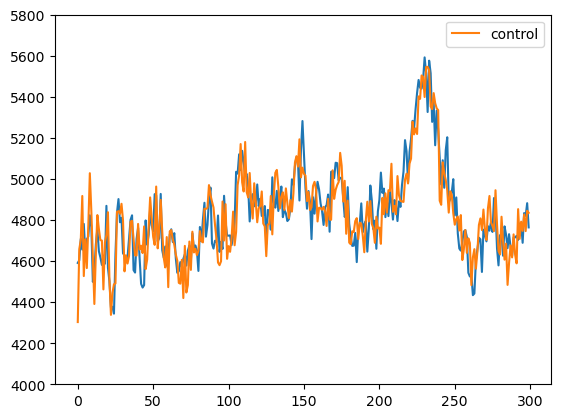

In [113]:
plt.hist(photocounts, bins=100)
plt.hist(photocounts_control, bins=100,label='control')
plt.legend()
plt.xlim((4000,5800))
plt.show()
plt.plot(photocounts)
plt.plot(photocounts_control,label='control')
plt.legend()
plt.ylim((4000,5800))
plt.show()

control experiment with coil off every other iteration

In [102]:
f = h5py.File(os.path.join(results, '2023-09-05\\15\\000004941-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts_all = list(f['datasets']['photocounts'])[1:]
photocounts_control = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==0]
photocounts = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==1]

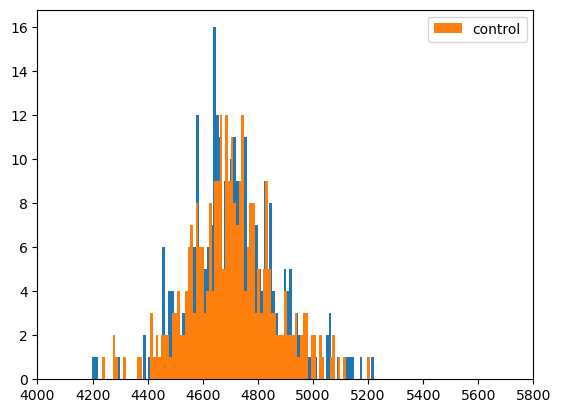

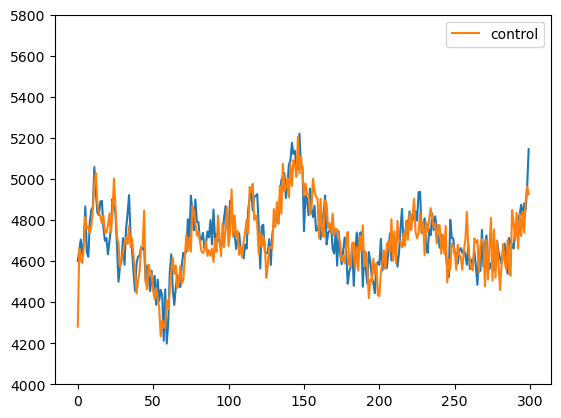

In [105]:
plt.hist(photocounts, bins=100)
plt.hist(photocounts_control, bins=100,label='control')
plt.legend()
plt.xlim((4000,5800))
plt.show()
plt.plot(photocounts)
plt.plot(photocounts_control,label='control')
plt.legend()
plt.ylim((4000,5800))
plt.show()

control experiment with the RP off. the data indicates that the SPCM signal is not actually from the MOT, despite what I saw with the SamplerCoilTune run just before running these. So apparently it drifts.

In [96]:
f = h5py.File(os.path.join(results, '2023-09-05\\13\\000004921-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts_noRP = list(f['datasets']['photocounts'])[1:]

f = h5py.File(os.path.join(results, '2023-09-05\\13\\000004920-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts = list(f['datasets']['photocounts'])[1:]

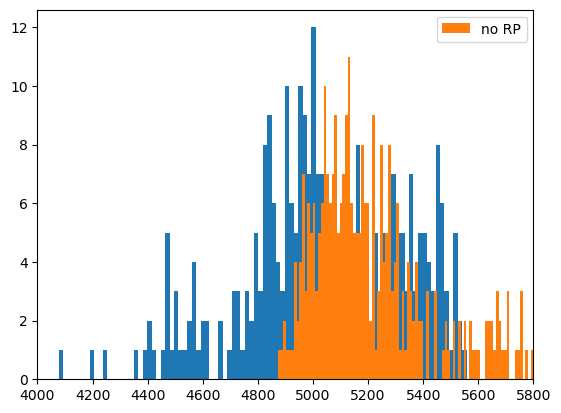

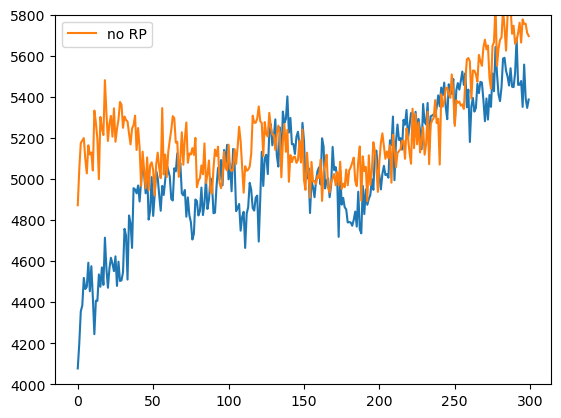

In [98]:
plt.hist(photocounts, bins=100)
plt.hist(photocounts_noRP, bins=100,label='no RP')
plt.legend()
plt.xlim((4000,5800))
plt.show()
plt.plot(photocounts)
plt.plot(photocounts_noRP,label='no RP')
plt.legend()
plt.ylim((4000,5800))
plt.show()

In [ ]:
atom loading experiment

In [91]:
f = h5py.File(os.path.join(results, '2023-09-05\\13\\000004920-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts = list(f['datasets']['photocounts'])[1:]

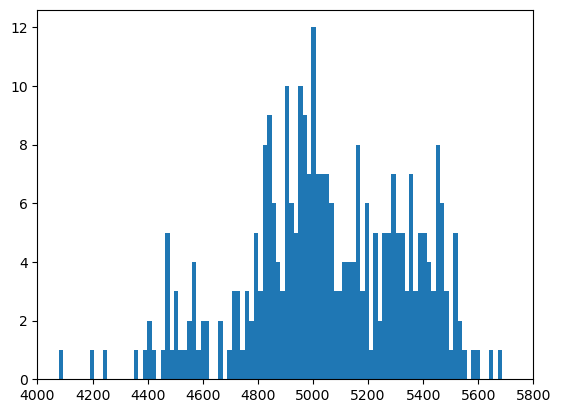

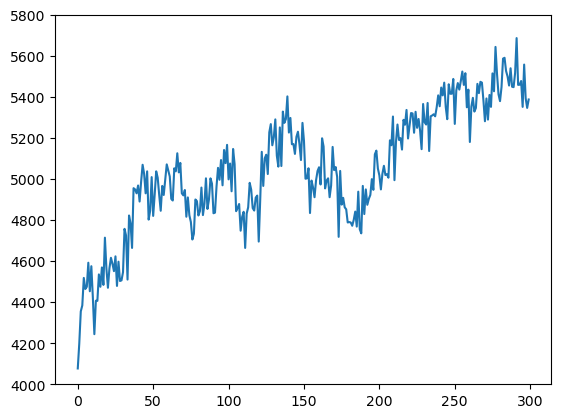

In [92]:
plt.hist(photocounts, bins=100)
plt.xlim((4000,5800))
plt.show()
plt.plot(photocounts)
plt.ylim((4000,5800))
plt.show()

In [ ]:
plt.

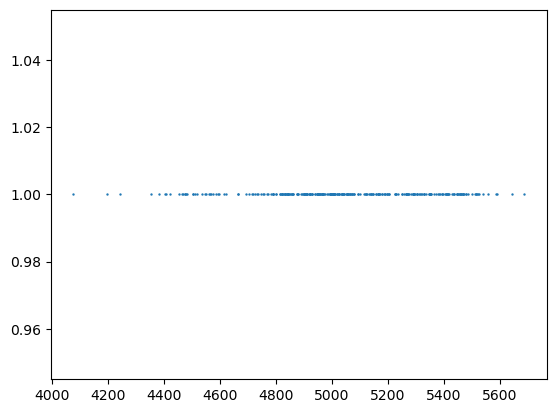

In [71]:
plt.scatter(photocounts,[1]*len(photocounts),s=0.5)

In [ ]:
ax=plt.contour(photocounts)
fig.colorbar()

### 2023.09.04

control experiment with the FORT off shows that most of the background is just from the FORT being on. This should be fixed before proceeding, most likely.

In [45]:
f = h5py.File(os.path.join(results, '2023-09-04\\16\\000004869-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts = list(f['datasets']['photocounts'])[1:]

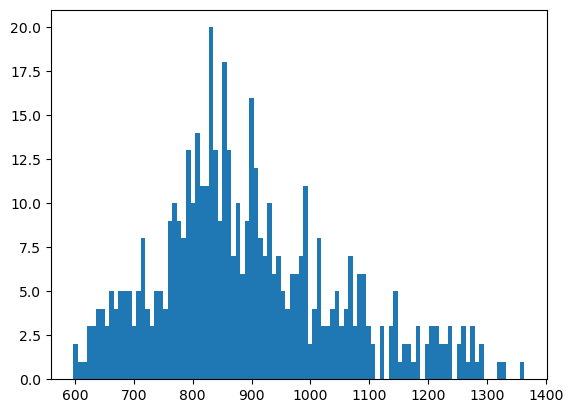

In [46]:
plt.hist(photocounts, bins=100)
plt.show()

In [48]:
f = h5py.File(os.path.join(results, '2023-09-04\\15\\000004868-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts = list(f['datasets']['photocounts'])[1:]

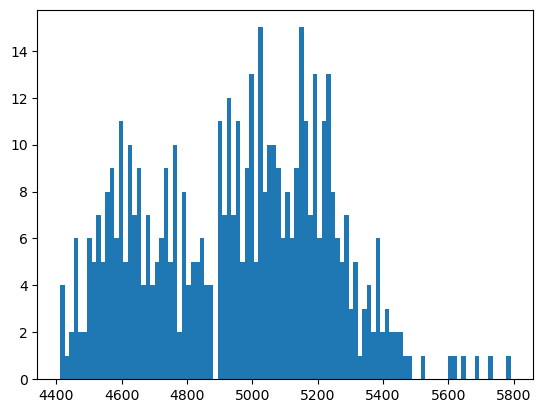

In [51]:
plt.hist(photocounts, bins=100)
plt.show()

In [30]:
[x for x in f['datasets'].values()]

[<HDF5 dataset "AOM_A1_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A2_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A3_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A4_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A5_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A6_power": shape (), type "<f8">,
 <HDF5 dataset "MOT1_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT2_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT3_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT4_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT5_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT6_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT_switchyard_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "monitor_pts": shape (1,), type "<i4">,
 <HDF5 dataset "p_cooling_DP_MOT": shape (), type "<f8">,
 <HDF5 dataset "photocount_bins": shape (1,), type "<i4">,
 <HDF5 dataset "photocounts": shape (501,), type "<i4">]

In [31]:
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]

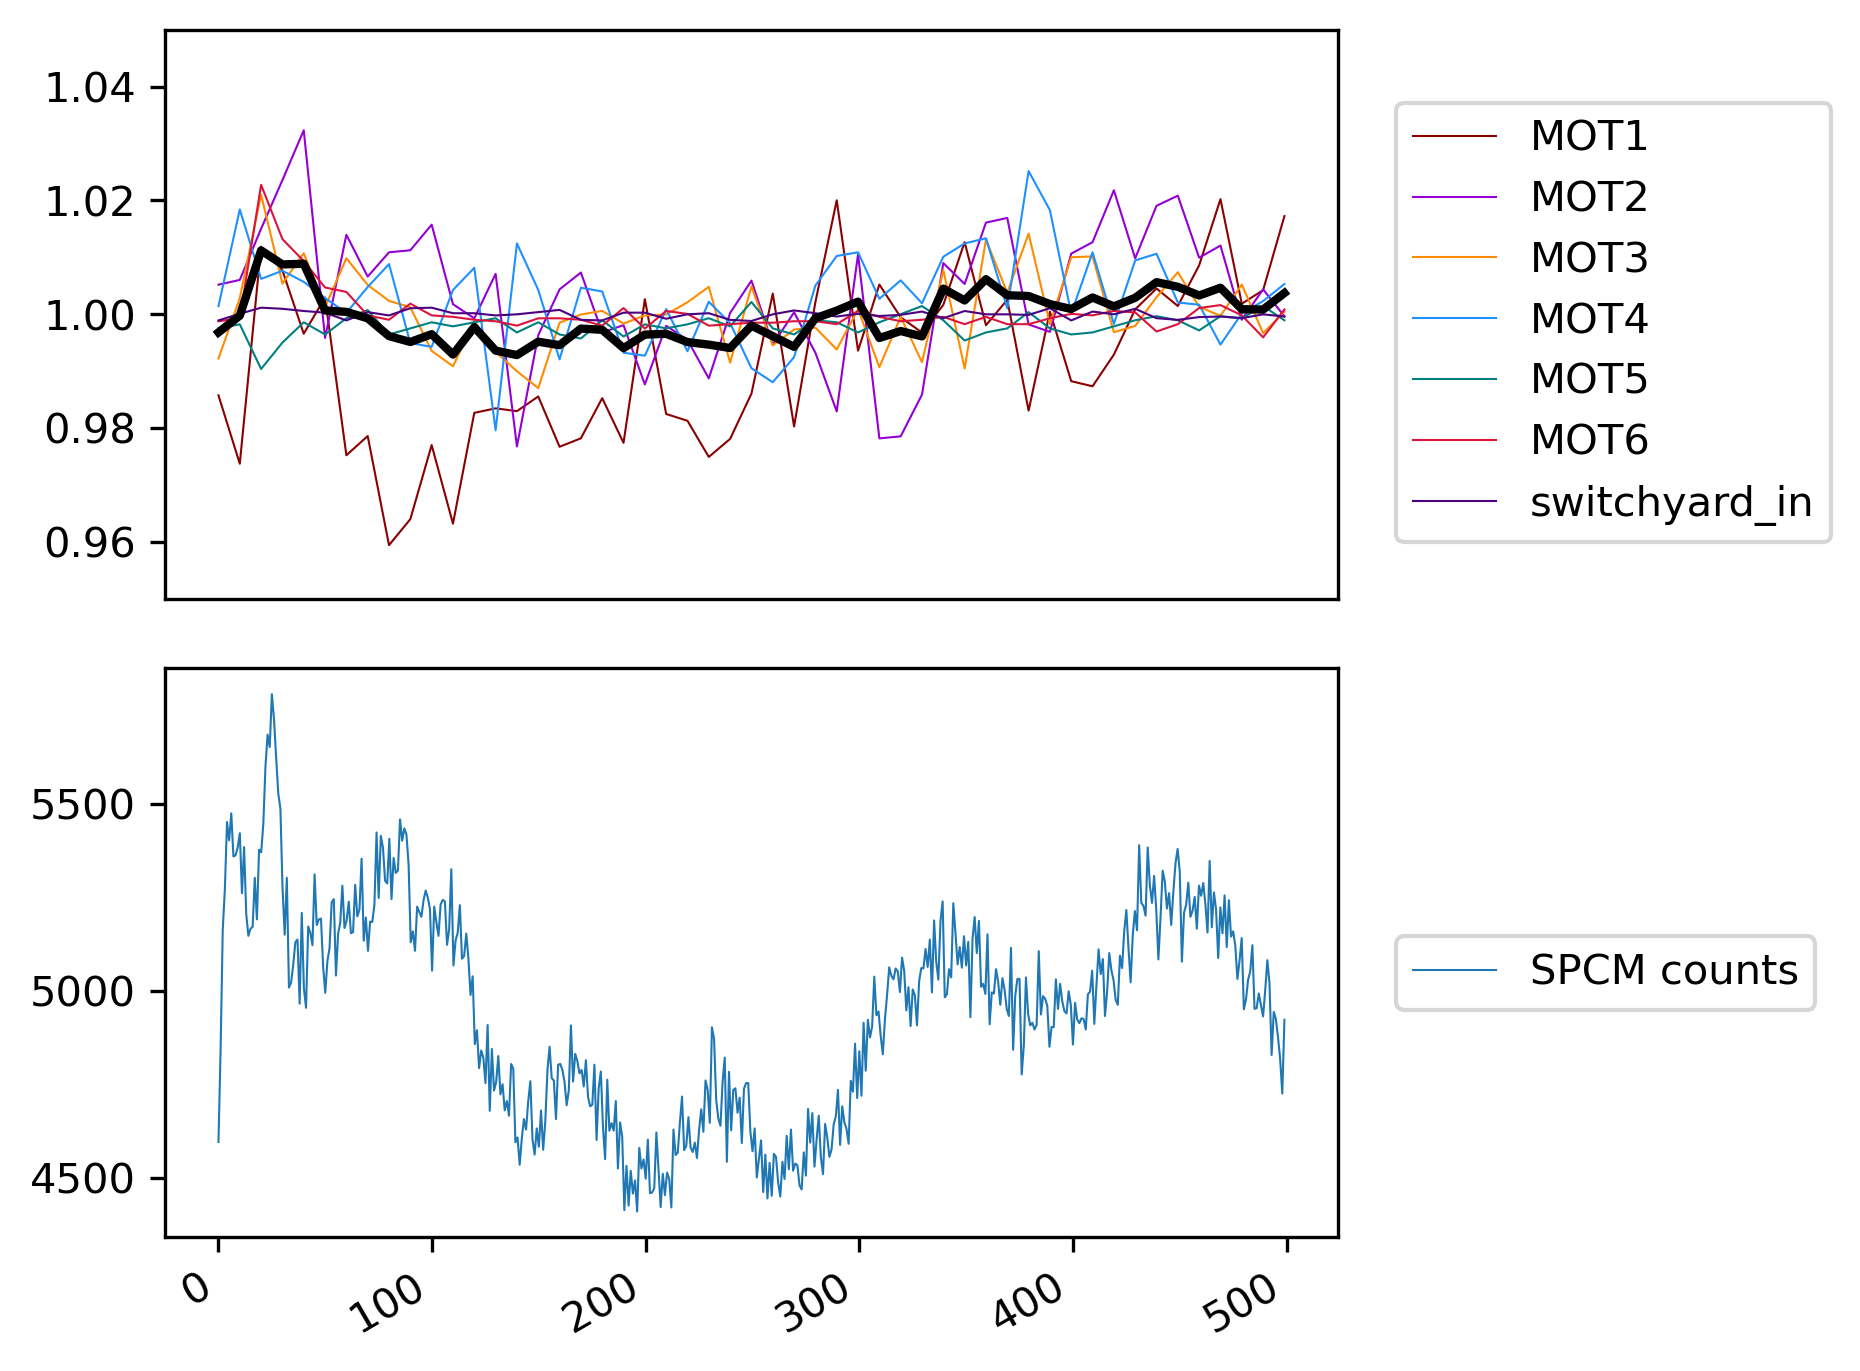

In [44]:
labels = [f'MOT{i+1}' for i in range(6)]+['switchyard_in']
fig,axes = plt.subplots(nrows=2,dpi=300)
ax, ax2 = axes
colors = ['darkred','darkviolet','darkorange','dodgerblue','teal','crimson','indigo']
for label,data,color in zip(labels,MOTdata,colors):
    ypts = data[20:] # the feedback runs 20 times before we start counting photons
    xpts = range(len(ypts))
#     ax.scatter(xpts, ypts, color=color,s=0.1)
    ax.plot(xpts, ypts, color=color, label=label,linewidth=0.5)
    ax.set_ylim((0.95,1.05))
    ax.legend(loc=(1.05,0.1))
ax.get_xaxis().set_visible(False)
counts_steps = len(photocounts)

ax.plot(np.mean([x[20:] for x in MOTdata[:-1]],axis=0),linewidth=2,c='k')

ax2.plot(range(counts_steps),photocounts,label='SPCM counts',linewidth=0.5)
# ax2.set_xticks(timestamps)
plt.gcf().autofmt_xdate()
ax2.legend(loc=(1.05,0.4))
fig.tight_layout()

## May 2023

In [30]:
expdir = "C:\\Networking Experiment\\artiq codes\\artiq-master\\repository\\qn_artiq_routines\\analysis\\csv_data\\"
datafile = os.path.join(expdir,"results\\20230531_083727_atom_loading_counts.csv") # no FORT

has_header = True
with open(datafile, 'r', newline='') as f:
    reader = csv.reader(f)
    if has_header:
        header = reader.__next__()
    data = [row for row in reader]
    f.close()

data = np.array(data,float).transpose()
rows,cols = data.shape
print("rows:", rows, "cols:", cols)

counts = data[0]

rows: 1 cols: 200


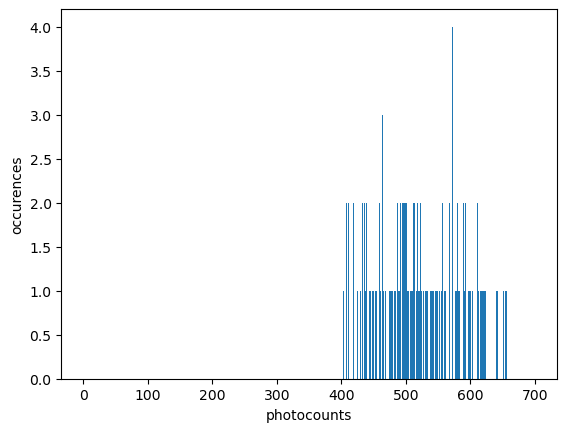

In [29]:
fig, ax = plt.subplots()
# bins = np.linspace(int(min(counts))-10,int(max(counts))+10,int(max(counts))-int(min(counts))+20)
bins = np.linspace(1,700,700)
ax.hist(counts,bins=bins)
ax.set_xlabel("photocounts")
ax.set_ylabel("occurences")
plt.show()

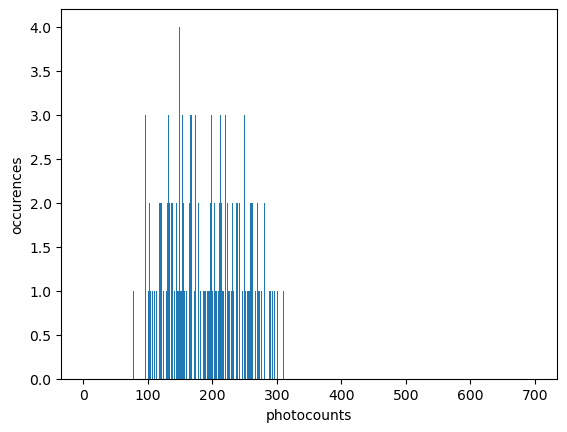

In [31]:
fig, ax = plt.subplots()
# bins = np.linspace(int(min(counts))-10,int(max(counts))+10,int(max(counts))-int(min(counts))+20)
bins = np.linspace(1,700,700)
ax.hist(counts,bins=bins)
ax.set_xlabel("photocounts")
ax.set_ylabel("occurences")
plt.show()

In [9]:
ax.hist?